# TASK-1:  Amazon Fine Food Reviews Analysis with Dask 

In [11]:
# importing dask
import dask.dataframe as dd

# loading the file
df = dd.read_csv("D:/CODtech It intern/task 1/Reviews.csv")

# Previewing the data
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [5]:
# Checking column names
print(df.columns)

# Selecting the relevant columns
df = df[['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
         'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text']]

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')


Average Score: 4.183198640523243


<Axes: title={'center': 'Review Score Distribution'}, xlabel='Score'>

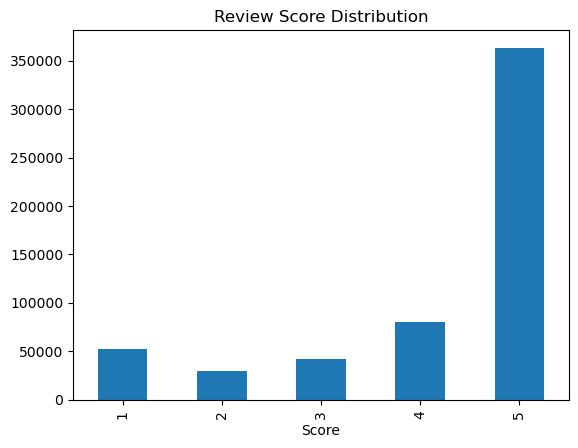

In [6]:
# showing average score
avg_score = df['Score'].mean().compute()
print("Average Score:", avg_score)

# showing reviews score distribution
score_counts = df['Score'].value_counts().compute()
score_counts.plot(kind='bar', title='Review Score Distribution')

In [7]:
# Adding a column for review length
df['text_length'] = df['Text'].str.len()

# displaying average review length
avg_length = df['text_length'].mean().compute()
print("Average Review Length:", avg_length)

Average Review Length: 436.22208305333413


<Axes: title={'center': 'Average Review Score by Year'}, xlabel='Year'>

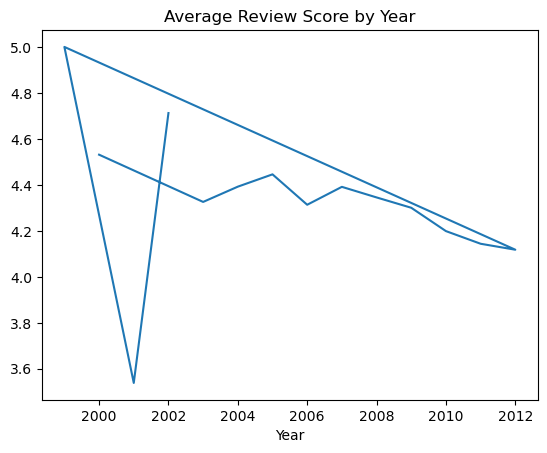

In [8]:
#importing pandas
import pandas as pd

# Converting Unix time to datetime
df['Time'] = dd.to_datetime(df['Time'], unit='s')

# Grouping it by year
df['Year'] = df['Time'].dt.year
yearly_avg = df.groupby('Year')['Score'].mean().compute()

# Ploting it in a graph
yearly_avg.plot(title='Average Review Score by Year')